In [3]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("annotated_points_np_202.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       202 non-null    float64
 1   y       202 non-null    float64
 2   labels  202 non-null    float64
dtypes: float64(3)
memory usage: 4.9 KB


In [6]:
df.head()

,x,y,labels
0,13.467742,27.486331,4.0
1,10.483871,26.453430,4.0
2,8.971774,27.568963,4.0
3,7.802419,28.725813,4.0
4,5.665323,28.560549,4.0


In [7]:
df.tail()

,x,y,labels
197,19.637097,1.085373,5.0
198,20.362903,1.415901,5.0
199,10.665323,7.737257,5.0
200,10.745968,10.629381,5.0
201,9.596774,9.348584,5.0


In [8]:
Y = df['labels']

In [9]:
X = df.drop(columns='labels')

In [10]:
bias = np.ones(len(X))

In [11]:
bias.size

202

In [12]:
X['bias'] = bias

In [13]:
X.head()

,x,y,bias
0,13.467742,27.486331,1.0
1,10.483871,26.453430,1.0
2,8.971774,27.568963,1.0
3,7.802419,28.725813,1.0
4,5.665323,28.560549,1.0


In [14]:
X.tail()

,x,y,bias
197,19.637097,1.085373,1.0
198,20.362903,1.415901,1.0
199,10.665323,7.737257,1.0
200,10.745968,10.629381,1.0
201,9.596774,9.348584,1.0


In [15]:
Y = Y.apply(lambda value: 1 if value==4 else -1  )

In [16]:
def perceptron(X, Y, init_method, number_of_iter=100):
    n_samples, n_features = X.shape
    if init_method == "random":
        W = np.random.randn(n_features)
    elif init_method == "dataset":
        W = np.mean(X[Y == 1], axis=0)  
    elif init_method == "zeros":
        W = np.zeros(n_features)
    else:
        raise ValueError("Invalid initialization method.")
    for t in range(number_of_iter):
        for i in range(n_samples):
            v = Y[i]*(np.dot(W, X.iloc[i]))
            if v<=0:
                W += Y[i]*X.iloc[i] 
    return W

In [119]:
Weights_random = perceptron(X, Y, "random", 2000)

In [120]:
Weights_dataset = perceptron(X, Y, "dataset", 2000)

In [121]:
Weights_zeros = perceptron(X, Y, "zeros", 2000)

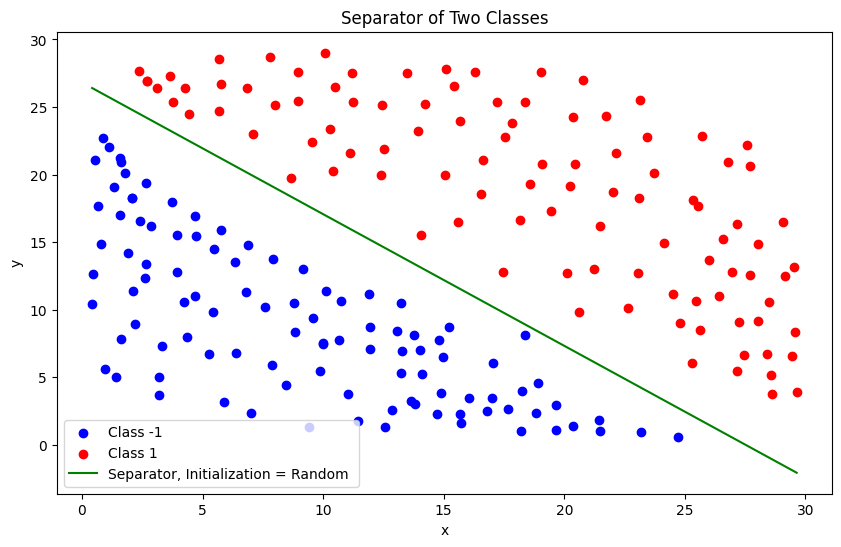

In [123]:
X['label'] = Y  
plt.figure(figsize=(10, 6))
for label, color in zip([-1, 1], ['blue', 'red']):  
    class_data = X[X['label'] == label]
    plt.scatter(class_data['x'], class_data['y'], label=f'Class {label}', color=color)


a_random = Weights_random[0]
b_random = Weights_random[1]
c_random = - Weights_random[2]

x_values = np.linspace(min(X['x']), max(X['x']), 400)  
y_values_random = (c_random - a_random* x_values) / b_random 
plt.plot(x_values, y_values_random, label='Separator, Initialization = Random ', color='green')


plt.xlabel('x')
plt.ylabel('y')
plt.title('Separator of Two Classes')
plt.legend()
plt.show()


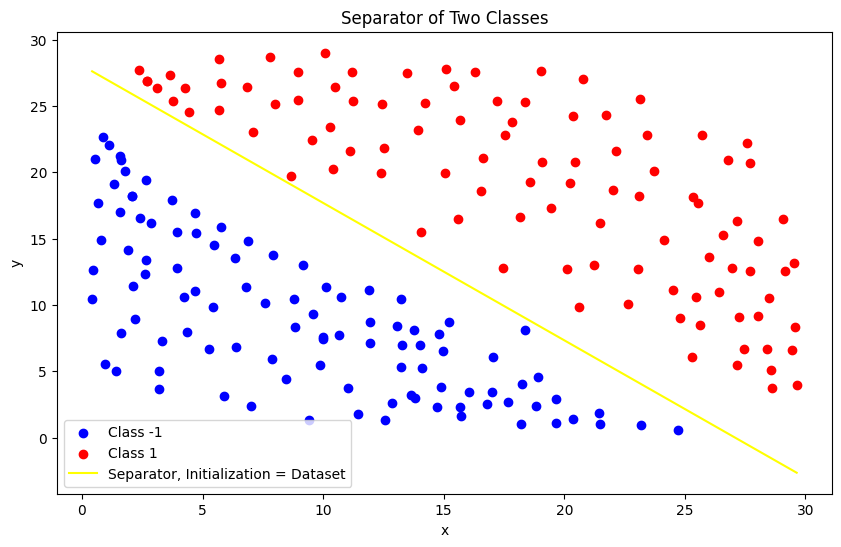

In [124]:
X['label'] = Y  
plt.figure(figsize=(10, 6))
for label, color in zip([-1, 1], ['blue', 'red']):  
    class_data = X[X['label'] == label]
    plt.scatter(class_data['x'], class_data['y'], label=f'Class {label}', color=color)


x_values = np.linspace(min(X['x']), max(X['x']), 400)  

a_dataset = Weights_dataset[0]
b_dataset = Weights_dataset[1]
c_dataset = - Weights_dataset[2]
y_values_dataset = (c_dataset - a_dataset* x_values) / b_dataset 
plt.plot(x_values, y_values_dataset, label='Separator, Initialization = Dataset', color='yellow')


plt.xlabel('x')
plt.ylabel('y')
plt.title('Separator of Two Classes')
plt.legend()
plt.show()


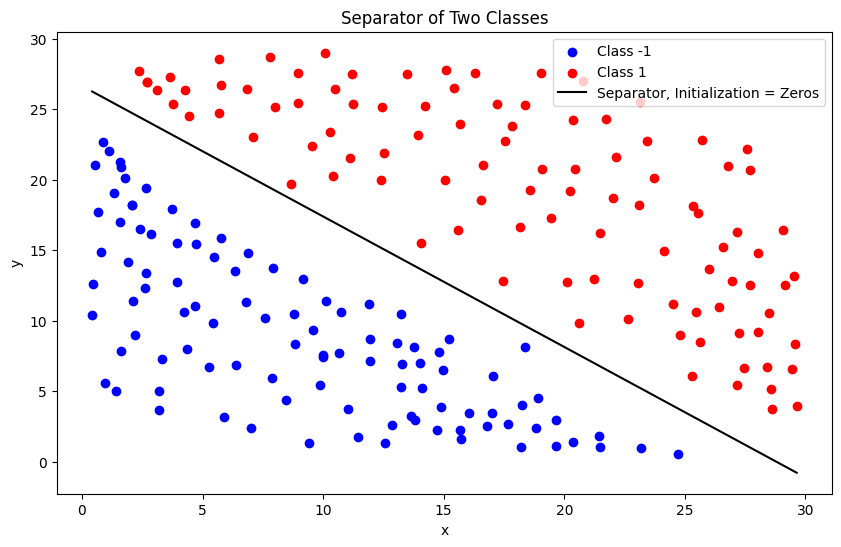

In [125]:
X['label'] = Y  
plt.figure(figsize=(10, 6))
for label, color in zip([-1, 1], ['blue', 'red']):  
    class_data = X[X['label'] == label]
    plt.scatter(class_data['x'], class_data['y'], label=f'Class {label}', color=color)



x_values = np.linspace(min(X['x']), max(X['x']), 400)  

a_zeros = Weights_zeros[0]
b_zeros = Weights_zeros[1]
c_zeros = - Weights_zeros[2]
y_values_zeros = (c_zeros - a_zeros*x_values) / b_zeros 
plt.plot(x_values, y_values_zeros , label='Separator, Initialization = Zeros', color='black')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Separator of Two Classes')
plt.legend()
plt.show()


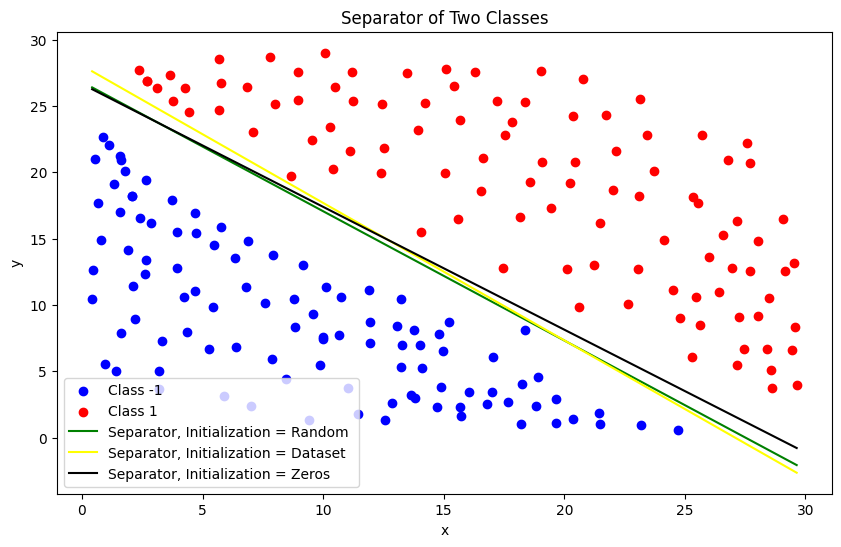

In [122]:
X['label'] = Y  
plt.figure(figsize=(10, 6))
for label, color in zip([-1, 1], ['blue', 'red']):  
    class_data = X[X['label'] == label]
    plt.scatter(class_data['x'], class_data['y'], label=f'Class {label}', color=color)


a_random = Weights_random[0]
b_random = Weights_random[1]
c_random = - Weights_random[2]

x_values = np.linspace(min(X['x']), max(X['x']), 400)  
y_values_random = (c_random - a_random* x_values) / b_random 
plt.plot(x_values, y_values_random, label='Separator, Initialization = Random ', color='green')

a_dataset = Weights_dataset[0]
b_dataset = Weights_dataset[1]
c_dataset = - Weights_dataset[2]
y_values_dataset = (c_dataset - a_dataset* x_values) / b_dataset 
plt.plot(x_values, y_values_dataset, label='Separator, Initialization = Dataset', color='yellow')

a_zeros = Weights_zeros[0]
b_zeros = Weights_zeros[1]
c_zeros = - Weights_zeros[2]
y_values_zeros = (c_zeros - a_zeros*x_values) / b_zeros 
plt.plot(x_values, y_values_zeros , label='Separator, Initialization = Zeros', color='black')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Separator of Two Classes')
plt.legend()
plt.show()
